### **Data Ingestion:**

In [1]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.5 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

emotions = load_dataset("dair-ai/emotion")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

### **Exploratory Data Analysis (EDA):**

In [3]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [5]:
len(train_ds)

16000

In [6]:
train_ds[1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

In [7]:
train_ds.column_names

['text', 'label']

In [8]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [9]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [10]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

### **Converting Dataset to Pandas DataFrame:**

In [11]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [12]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### **Data Visualization:**

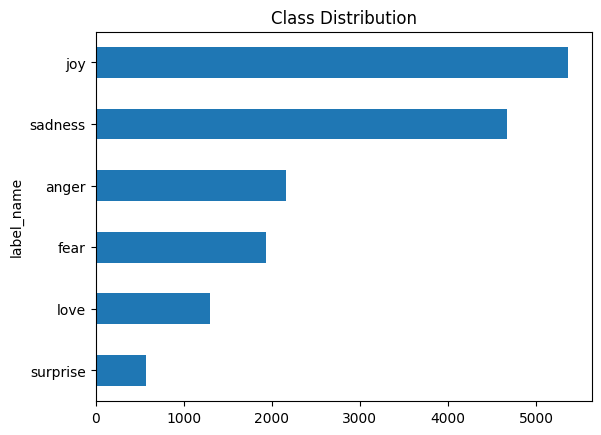

In [13]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()

plt.title("Class Distribution")
plt.show()

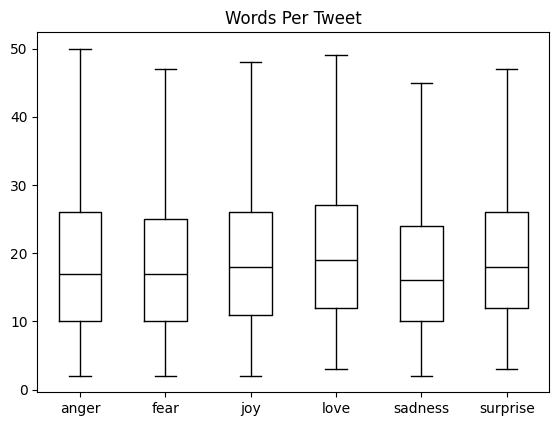

In [14]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)

df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")

plt.suptitle("")
plt.xlabel("")
plt.show()

In [15]:
emotions.reset_format()

### **Data Preprocessing:**

**1.** Character-Level Tokenization:

In [17]:
text = "It is fun to work with NLP using HuggingFace."
tokenized_text = list(text)
print(tokenized_text)

['I', 't', ' ', 'i', 's', ' ', 'f', 'u', 'n', ' ', 't', 'o', ' ', 'w', 'o', 'r', 'k', ' ', 'w', 'i', 't', 'h', ' ', 'N', 'L', 'P', ' ', 'u', 's', 'i', 'n', 'g', ' ', 'H', 'u', 'g', 'g', 'i', 'n', 'g', 'F', 'a', 'c', 'e', '.']


In [18]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'F': 2, 'H': 3, 'I': 4, 'L': 5, 'N': 6, 'P': 7, 'a': 8, 'c': 9, 'e': 10, 'f': 11, 'g': 12, 'h': 13, 'i': 14, 'k': 15, 'n': 16, 'o': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'w': 22}


In [19]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[4, 20, 0, 14, 19, 0, 11, 21, 16, 0, 20, 17, 0, 22, 17, 18, 15, 0, 22, 14, 20, 13, 0, 6, 5, 7, 0, 21, 19, 14, 16, 12, 0, 3, 21, 12, 12, 14, 16, 12, 2, 8, 9, 10, 1]


**2.** Understanding One-Hot Encoding:

In [20]:
df = pd.DataFrame({
    "name": ["can", "efe", "ada"],
    "label": [0, 1, 2]
})
df

,name,label
0,can,0
1,efe,1
2,ada,2


In [21]:
pd.get_dummies(df, dtype=int)

,label,name_ada,name_can,name_efe
0,0,0,1,0
1,1,0,0,1
2,2,1,0,0


**3.** One-Hot Encoding in PyTorch:

In [22]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([45, 23])

In [23]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor Index: {input_ids[0]}")
print(f"One-Hot Encoding: {one_hot_encodings[0]}")

Token: I
Tensor Index: 4
One-Hot Encoding: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


**4.** Word-Level Tokenization:

In [24]:
tokenized_text = text.split()
print(tokenized_text)

['It', 'is', 'fun', 'to', 'work', 'with', 'NLP', 'using', 'HuggingFace.']


**5.** Subword-Level Tokenization:

In [25]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

**6.** Custom Tokenization:

In [26]:
from transformers import DistilBertTokenizer

distbert_tokenize = DistilBertTokenizer.from_pretrained(model_ckpt)

**7.** Working with Tokenizers:

In [27]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2009, 2003, 4569, 2000, 2147, 2007, 17953, 2361, 2478, 17662, 12172, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [28]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'it', 'is', 'fun', 'to', 'work', 'with', 'nl', '##p', 'using', 'hugging', '##face', '.', '[SEP]']


In [29]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] it is fun to work with nlp using huggingface. [SEP]'

**8.** Tokenizer Attributes:

In [30]:
tokenizer.vocab_size

30522

In [31]:
tokenizer.model_max_length

512

**9.** Batch Tokenization:

In [32]:
def tokenize(batch):
    return tokenizer(batch["text"], truncation=True)

In [33]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [34]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

**10.** Sequence Padding:

In [35]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [36]:
emotions_encoded["train"].column_names

['text', 'label', 'input_ids', 'attention_mask']

### **Model Training:**

In [37]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**1.** Evaluate:

In [38]:
!pip install -q evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.0 MB/s eta 0:00:00


In [39]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

**2.** Logging to Hugging Face Hub:

In [40]:
from huggingface_hub import notebook_login

notebook_login()

**3.** Configuring Training Arguments:

In [41]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="distilbert-emotion",
    num_train_epochs=2,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=True,
    report_to="none"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [42]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    tokenizer=tokenizer,
)

<ipython-input-42-802dc9679f29>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [43]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.185738,0.925500
2,0.338600,0.144752,0.942000


TrainOutput(global_step=500, training_loss=0.33857757568359376, metrics={'train_runtime': 181.5085, 'train_samples_per_second': 176.3, 'train_steps_per_second': 2.755, 'total_flos': 467179604923392.0, 'train_loss': 0.33857757568359376, 'epoch': 2.0})

### **Model Evaluation:**

**1.** Evaluating on the Validation Dataset:

In [44]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [45]:
preds_output.metrics

{'test_loss': 0.14475227892398834,
 'test_accuracy': 0.942,
 'test_runtime': 3.4403,
 'test_samples_per_second': 581.347,
 'test_steps_per_second': 9.302}

**2.** Confusion Matrix:

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(preds_output.predictions, axis=1)

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized Confusion Matrix")
    plt.show()

In [47]:
y_valid = np.array(emotions_encoded["validation"]["label"])
labels = emotions["train"].features["label"].names

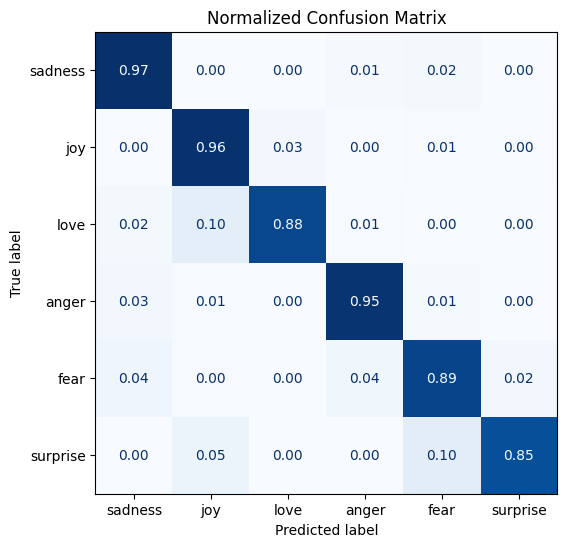

In [48]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [49]:
trainer.push_to_hub(commit_message="Model Training Successfully Completed!")

CommitInfo(commit_url='https://huggingface.co/kevin17daniel/distilbert-emotion/commit/b29cb54c37b14b96e7cceda58227680ba437c609', commit_message='Model Training Successfully Completed!', commit_description='', oid='b29cb54c37b14b96e7cceda58227680ba437c609', pr_url=None, repo_url=RepoUrl('https://huggingface.co/kevin17daniel/distilbert-emotion', endpoint='https://huggingface.co', repo_type='model', repo_id='kevin17daniel/distilbert-emotion'), pr_revision=None, pr_num=None)

### **Model Inference:**

In [67]:
from transformers import pipeline

model_id = "kevin17daniel/distilbert-emotion"
classifier = pipeline("text-classification", model=model_id)

Device set to use cuda:0


In [68]:
custom_text = "Pope Francis is showing a ‘good response’ to treatment, Vatican says."

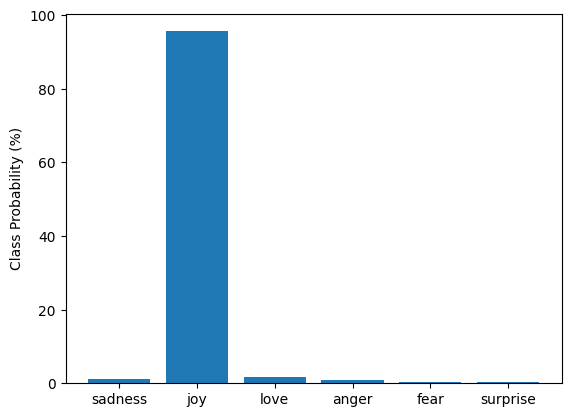

In [69]:
preds = classifier(custom_text, return_all_scores=True)
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"])
plt.ylabel("Class Probability (%)")
plt.show()

In [70]:
custom_text = "NASA’s Artemis I mission has successfully launched, marking a significant milestone in lunar exploration."

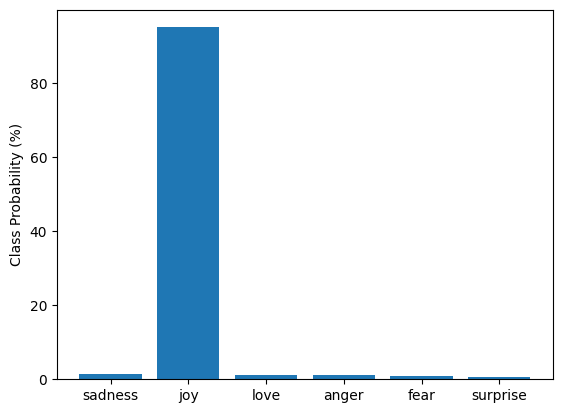

In [71]:
preds = classifier(custom_text, return_all_scores=True)
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"])
plt.ylabel("Class Probability (%)")
plt.show()